In [17]:
import hhgen.plots as plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [18]:
features = ['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg']
features+=['leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta']
features+=['leadPho_pt','leadPho_eta','subleadPho_pt','subleadPho_eta']

scaler=RobustScaler()

In [19]:
#merging 4 nodes without category 0
node_6=pd.read_hdf("node_6.hd5")
node_4=pd.read_hdf("node_4.hd5")
node_9=pd.read_hdf("node_9.hd5")
node_SM=pd.read_hdf("node_SM.hd5")

frames=[node_6,node_4,node_SM,node_9]
df=pd.concat(frames)

df=df.loc[df.cat>0]
df.weight/=df.weight.mean()

#indexing
random_index = np.arange(df.shape[0]) 
np.random.shuffle(random_index)
df.loc[:,"random_index"]=random_index 
df.set_index("random_index",inplace=True)
df.sort_index(inplace=True)

X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

Weighted least squares for true/pred plot:  25.5176837446
Spread for truth/pred plot:  0.222808445201


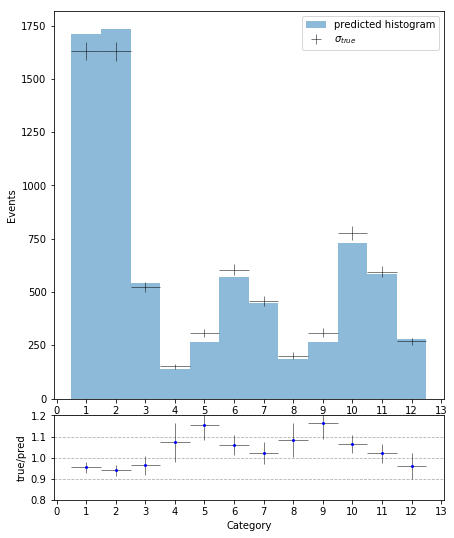

In [6]:
#no reweight
clf = joblib.load('clf_4nodes.joblib') 

#predicting probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
#predicting weight of each data in test set according to category 
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- event number(rows)*category number (columns)
y_pred=np.arange(1,13,step=1).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

Weighted least squares for true/pred plot:  3.38798025772
Spread for truth/pred plot:  0.0758097185118


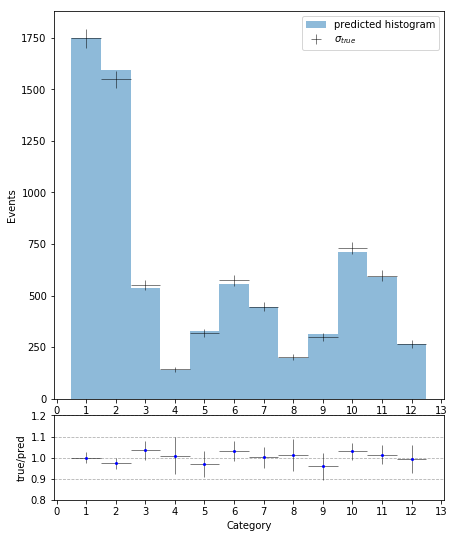

In [20]:
#merged
clf = joblib.load('clf1_4nodes.joblib') 

#predicting probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
#predicting weight of each data in test set according to category 
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- event number(rows)*category number (columns)
y_pred=np.arange(1,13,step=1).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)